In [7]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import plot_model

In [4]:
from keras.layers import Flatten, Dense
from keras.models import Model

In [12]:
from keras.applications import VGG16
vgg16 = VGG16(input_shape=(128,128,3),include_top = False, weights = 'imagenet')
vgg16.trainable=False
x = Flatten()(vgg16.output)
x = Dense(3,activation='sigmoid')(x)
model = Model(inputs = vgg16.input , outputs = x)
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics=['accuracy'])

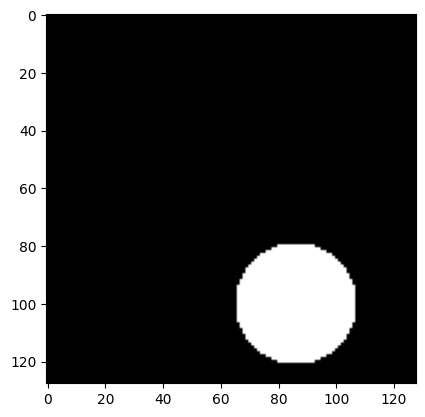

In [13]:

from matplotlib.patches import Circle

def synthetic_gen(batch_size=64):
  # enable generating infinite amount of batches
  while True:
      # generate black images in the wanted size
      X = np.zeros((batch_size, 128, 128, 3))
      Y = np.zeros((batch_size, 3))
      # fill each image
      for i in range(batch_size):
        x = np.random.randint(8,120)
        y = np.random.randint(8,120)
        a = min(128 - max(x,y), min(x,y))
        r = np.random.randint(4,a)
        for x_i in range(128):
          for y_i in range(128):
            if ((x_i - x)**2) + ((y_i - y)**2) < r**2:
              X[i, x_i, y_i,:] = 1
        Y[i,0] = (x-r)/128.
        Y[i,1] = (y-r)/128.
        Y[i,2] = 2*r / 128.
      yield X, Y

# sanity check - plot the images
x,y = next(synthetic_gen())
plt.imshow(x[0])

In [16]:
model.fit(synthetic_gen(),steps_per_epoch=64,epochs=5)

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8102 - loss: 0.5429
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9478 - loss: 0.4993
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9598 - loss: 0.4942
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.9710 - loss: 0.4943
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9691 - loss: 0.4927


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


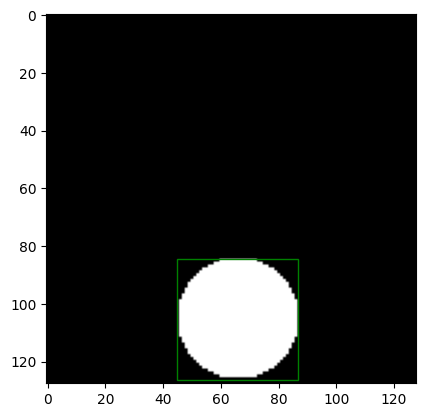

In [18]:

from matplotlib.patches import Rectangle

# given image and a label, plots the image + rectangle
def plot_pred(img,p):
  fig, ax = plt.subplots(1)
  ax.imshow(img)
  rect = Rectangle(xy=(p[1]*128,p[0]*128),width=p[2]*128, height=p[2]*128, linewidth=1,edgecolor='g',facecolor='none')
  ax.add_patch(rect)
  plt.show()


# generate new image
x, _ = next(synthetic_gen())
# predict
pred = model.predict(x)
# examine 1 image
im = x[0]
p = pred[0]
plot_pred(im,p)

In [21]:
pred.shape

(64, 3)

In [24]:
x.shape

(64, 128, 128, 3)